# Session 14: Gradient Descent for Multivariate Linear Regression

In this session, we will:
1. Learn the basics of **NumPy** for numerical computing
2. Understand **gradient descent** optimization
3. Implement **multivariate linear regression** from scratch

---
## Part 1: Introduction to NumPy

NumPy is the fundamental package for numerical computing in Python. It provides:
- N-dimensional arrays (`ndarray`)
- Broadcasting for element-wise operations
- Linear algebra operations
- Mathematical functions optimized for arrays

In [ ]:
import numpy as np

alias

### 1.1 Creating Arrays

In [ ]:
# From Python lists
arr1 = np.array([-1, 2, 3, 4, 5], dtype=np.int8)
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}")
print(f"Dtype: {arr1.dtype}")

1D array: [-1  2  3  4  5]
Shape: (5,)
Dtype: int8


In [ ]:
# 2D array (matrix)
arr2 = np.array([[1, 2, 3], 
                 [4, 5, 6]])
print(f"2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")  # (rows, columns)

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [ ]:
# Common array creation functions
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
random = np.random.randn(3, 3) # 3x3 matrix of random values (normal distribution)
arange = np.arange(0, 10, 2)   # [0, 2, 4, 6, 8]
linspace = np.linspace(0, 1, 5) # 5 evenly spaced values from 0 to 1

print(f"zeros:\n{zeros}\n")
print(f"ones:\n{ones}\n")
print(f"random:\n{random}\n")
print(f"arange: {arange}")
print(f"linspace: {linspace}")

zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

ones:
[[1. 1. 1.]
 [1. 1. 1.]]

random:
[[ 0.58471514 -0.08307385 -1.71120689]
 [-0.33171331  0.24467685 -0.34566622]
 [ 1.19846302  1.14125659  0.49397626]]

arange: [0 2 4 6 8]
linspace: [0.   0.25 0.5  0.75 1.  ]


### 1.2 Array Operations and Broadcasting

NumPy operations are **element-wise** by default. Broadcasting allows operations between arrays of different shapes.

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f"a + b = {a + b}")      # Element-wise addition
print(f"a * b = {a * b}")      # Element-wise multiplication
print(f"a ** 2 = {a ** 2}")    # Element-wise power
print(f"a * 10 = {a * 10}")    # Broadcasting: scalar applied to all elements

a + b = [5 7 9]
a * b = [ 4 10 18]
a ** 2 = [1 4 9]
a * 10 = [10 20 30]


In [ ]:
# Broadcasting with 2D arrays
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])
row_vector = np.array([10, 20, 30])

"""
[[10, 20, 30],
[10, 20 ,30]]
"""

# The row vector is "broadcast" to each row of the matrix
result = matrix + row_vector
print(f"Matrix + row_vector:\n{result}")

Matrix + row_vector:
[[11 22 33]
 [14 25 36]]


### 1.3 Matrix Operations

For linear regression, we need matrix multiplication and transpose.

In [ ]:
A = np.array([[1, 2], 
              [3, 4]])
B = np.array([[5, 6], 
              [7, 8]])

# Matrix multiplication (dot product)
print(f"A @ B (matrix multiplication):\n{A @ B}")
print(f"\nnp.dot(A, B):\n{np.dot(A, B)}")

# Transpose
print(f"\nA.T (transpose):\n{A.T}")

A @ B (matrix multiplication):
[[19 22]
 [43 50]]

np.dot(A, B):
[[19 22]
 [43 50]]

A.T (transpose):
[[1 3]
 [2 4]]


### 1.4 Useful Aggregation Functions

In [ ]:
arr = np.array([[1, 2, 3],
                [4, 5, 6]])

print(f"Sum all: {np.sum(arr)}")
print(f"Sum along rows (axis=1): {np.sum(arr, axis=1)}")
print(f"Sum along columns (axis=0): {np.sum(arr, axis=0)}")
print(f"Mean: {np.mean(arr)}")
print(f"Std: {np.std(arr)}")

Sum all: 21
Sum along rows (axis=1): [ 6 15]
Sum along columns (axis=0): [5 7 9]
Mean: 3.5
Std: 1.707825127659933


---
## Part 2: Linear Regression Review

### What is Linear Regression?

Linear regression models the relationship between features $X$ and target $y$ as:

$$\hat{y} = X \cdot w + b$$

Where:
- $X$ is the feature matrix of shape `(n_samples, n_features)`
- $w$ is the weight vector of shape `(n_features,)`
- $b$ is the bias (intercept) scalar
- $\hat{y}$ is the predicted values

### The Goal

Find $w$ and $b$ that minimize the **Mean Squared Error (MSE)**:

$$\mathcal{L} = MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)^2$$

### Gradients for Linear Regression

For MSE loss with linear regression, the gradients are:

$$\nabla_w \mathcal{L} = \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial MSE}{\partial w} = \frac{2}{n}  (\hat{y} - y) X$$

$$\nabla_b \mathcal{L} = \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial MSE}{\partial b} = \frac{2}{n} \sum(\hat{y} - y)$$

Let's derive this step by step:

1. $MSE = \frac{1}{n}\sum(\hat{y} - y)^2 = \frac{1}{n}\sum(Xw + b - y)^2$

2. Using chain rule: $\frac{\partial MSE}{\partial w} = \frac{2}{n} \cdot (Xw + b - y) \cdot X$

3. In matrix form: $\frac{\partial MSE}{\partial w} = \frac{2}{n} (\hat{y} - y) X$


---
## Part 3: Gradient Descent

### What is Gradient Descent?

Gradient descent is an optimization algorithm that iteratively updates parameters to minimize a loss function.

Think of it like descending a mountain in fog - you can only feel the slope at your current position, so you take small steps in the steepest downward direction.

### The Update Rule

$$w_{new} = w_{old} - \alpha \cdot \nabla_w \mathcal{L} = w_{old} - \alpha \cdot \frac{\partial \mathcal{L}}{\partial w} $$

Where $\alpha$ is the **learning rate** - how big of a step we take.

---
## Part 4: Implementation from Scratch

Let's build our linear regression step by step.

In [ ]:
# First, let's create some synthetic data
np.random.seed(42)

# True parameters we want to learn
true_weights = np.array([2.0, -3.5, 1.5])
true_bias = 5.0

# Generate random features
n_samples = 1000
n_features = 3
X = np.random.randn(n_samples, n_features)

# Generate target with some noise
noise = np.random.randn(n_samples) * 0.5
y = X @ true_weights + true_bias + noise

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"True weights: {true_weights}")
print(f"True bias: {true_bias}")

X shape: (1000, 3)
y shape: (1000,)
True weights: [ 2.  -3.5  1.5]
True bias: 5.0


### 4.1 Core Functions

### In-class Task

Write `predict()`, `compute_mse()`, `compute_gradients()`, which perform neccessary operations for gradient descent.

In [ ]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    """
    Compute predictions for linear regression.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        w: Weight vector of shape (n_features,)
        b: Bias scalar
    
    Returns:
        Predictions of shape (n_samples,)
    """
    return X @ w + b
    pass

In [ ]:
def compute_mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute Mean Squared Error.
    
    Args:
        y_true: Actual target values
        y_pred: Predicted values
    
    Returns:
        MSE loss value
    """
    return np.mean(np.sum((y_pred - y_true) ** 2))

In [ ]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    
    Args:
        X: Feature matrix of shape (n_samples, n_features)
        y: True target values
        y_pred: Predicted values
    
    Returns:
        Tuple of (gradient_w, gradient_b)
    """
    n = len(x)
    grad_w = 2 / n * ((y_pred - y) @ X)
    grad_b = 2 / n * np.sum(y_pred - y)

    return grad_w, grad_b

### Compute first gradient

In [ ]:
w = np.ones((3))
b = np.array(0.0)
w

array([1., 1., 1.])

In [ ]:
X.shape, w.shape, b.shape # Should be ((1000, 3), (3,), (1,))

((1000, 3), (3,), ())

In [ ]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    """
    # FIX: Use 'X' (uppercase) or 'y' to get the number of samples
    n = len(y) 
    
    # Calculate error
    error = y_pred - y
    
    # Gradient for weights: (2/n) * X.T . error
    # Note: Ensure you use X.T (transpose) for the matrix math to work
    grad_w = (2/n) * (X.T @ error)
    
    # Gradient for bias
    grad_b = (2/n) * np.sum(error)
    
    return grad_w, grad_b

Can you observe what happen?

### 4.2 Training Loop

In [ ]:
def train_linear_regression(
    X: np.ndarray, 
    y: np.ndarray, 
    learning_rate: float = 0.01, 
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step = 25,
) -> tuple:
    
    n_samples, n_features = X.shape
    
    # Initialize parameters
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # 1. Forward pass (Predict)
        y_pred = predict(X, w, b)
        
        # 2. Compute Loss (MSE)
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)
        
        # 3. Compute Gradients
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        
        # 4. Update Parameters (Gradient Descent Step)
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [ ]:
def compute_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray) -> tuple:
    """
    Compute gradients for weights and bias.
    """
    # FIX: Ensure this is 'X' (uppercase) or 'y'
    n = len(y) 
    
    error = y_pred - y
    
    grad_w = (2/n) * (X.T @ error)
    grad_b = (2/n) * np.sum(error)
    
    return grad_w, grad_b

In [ ]:
# Train the model
learned_w, learned_b, losses = train_linear_regression(
    X, y, 
    learning_rate=0.01, 
    n_iterations=500
)

Iteration    0 | Loss: 45871.204812
Iteration   25 | Loss: 16066.821490
Iteration   50 | Loss: 5745.054594
Iteration   75 | Loss: 2166.887668
Iteration  100 | Loss: 925.066501
Iteration  125 | Loss: 493.531142
Iteration  150 | Loss: 343.352588
Iteration  175 | Loss: 291.002431
Iteration  200 | Loss: 272.719724
Iteration  225 | Loss: 266.321208
Iteration  250 | Loss: 264.076560
Iteration  275 | Loss: 263.287026
Iteration  300 | Loss: 263.008489
Iteration  325 | Loss: 262.909902
Iteration  350 | Loss: 262.874881
Iteration  375 | Loss: 262.862390
Iteration  400 | Loss: 262.857916
Iteration  425 | Loss: 262.856306
Iteration  450 | Loss: 262.855723
Iteration  475 | Loss: 262.855511
Iteration  499 | Loss: 262.855436


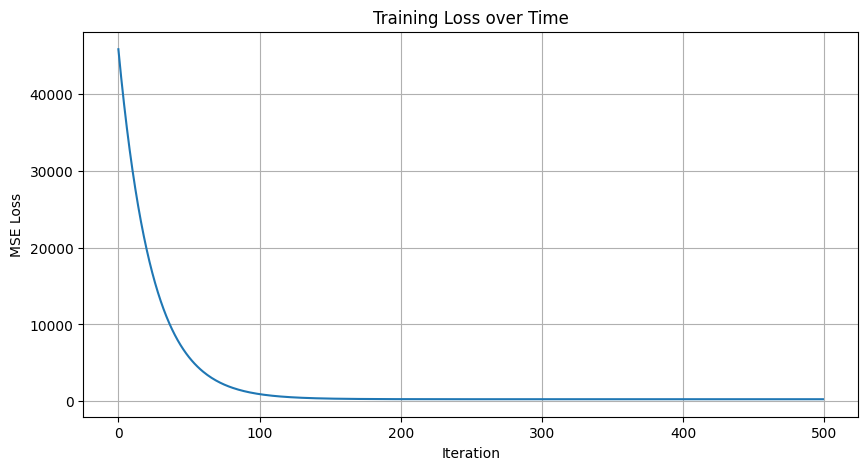

In [ ]:
# Visualize the loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Training Loss over Time')
plt.grid(True)
plt.show()

---
## Part 5: Feature Scaling

Gradient descent works much better when features are on similar scales. Let's see why and how to fix it.

This is statistical way to standarize any sameple of feature $i$ to a normal distribution:
$$X_i = \frac{x_i-\mu_i}{\sigma_i}$$
where $X_i$ is the column vector of raw data feature $i$

In [ ]:
# Create data with very different scales
np.random.seed(42)
X_unscaled = np.column_stack([
    np.random.randn(500) * 1000,      # Feature 1: scale ~1000
    np.random.randn(500) * 0.001,     # Feature 2: scale ~0.001
    np.random.randn(500)              # Feature 3: scale ~1
])
y_unscaled = X_unscaled @ np.array([0.001, 1000, 1]) + 5 + np.random.randn(500) * 0.5

print(f"Feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_unscaled[:, i].min():.2f}, {X_unscaled[:, i].max():.2f}]")

Feature ranges:
  Feature 1: [-3241.27, 3852.73]
  Feature 2: [-0.00, 0.00]
  Feature 3: [-2.90, 2.60]


In [ ]:
# This will likely fail or converge very slowly!
try:
    w_bad, b_bad, losses_bad = train_linear_regression(
        X_unscaled, y_unscaled, learning_rate=0.01, n_iterations=100
    )
except:
    print("Training failed due to numerical instability!")

Iteration    0 | Loss: 42848.057748
Iteration   25 | Loss: 435577579601040593114271221983259052287299186887987009492618246840414262856052461634322124408666183814522507183978027282786811320379347720709168304021829768737124633553813415913058678334381895263823978013303468204228608.000000
Iteration   50 | Loss: inf
Iteration   75 | Loss: nan
Iteration   99 | Loss: nan


C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_59596\249381018.py:12: RuntimeWarning: overflow encountered in square
  return np.mean(np.sum((y_pred - y_true) ** 2))
C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_59596\567635933.py:10: RuntimeWarning: overflow encountered in matmul
  grad_w = (2/n) * (X.T @ error)
C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_59596\567635933.py:10: RuntimeWarning: invalid value encountered in matmul
  grad_w = (2/n) * (X.T @ error)
C:\Users\HP OMEN\AppData\Local\Temp\ipykernel_59596\2149147273.py:30: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * grad_w


### Task: Implement standardize function

In [ ]:
def standardize(X: np.ndarray) -> tuple:
    """
    Standardize features to have mean=0 and std=1.
    Formula: z = (x - mean) / std
    """
    # Calculate mean and std along the columns (axis=0)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Avoid division by zero if std is 0 (though rare in random data)
    std[std == 0] = 1.0
    
    X_standardized = (X - mean) / std
    
    return X_standardized, mean, std

In [ ]:
# Standardize and train
X_scaled, X_mean, X_std = standardize(X_unscaled)

print(f"Scaled feature ranges:")
for i in range(3):
    print(f"  Feature {i+1}: [{X_scaled[:, i].min():.2f}, {X_scaled[:, i].max():.2f}]")

w_good, b_good, losses_good = train_linear_regression(
    X_scaled, y_unscaled, learning_rate=0.1, n_iterations=500
)

Scaled feature ranges:
  Feature 1: [-3.31, 3.92]
  Feature 2: [-2.79, 2.66]
  Feature 3: [-2.98, 2.47]
Iteration    0 | Loss: 14893.952513
Iteration   25 | Loss: 120.469274
Iteration   50 | Loss: 120.239388
Iteration   75 | Loss: 120.239384
Iteration  100 | Loss: 120.239384
Iteration  125 | Loss: 120.239384
Iteration  150 | Loss: 120.239384
Iteration  175 | Loss: 120.239384
Iteration  200 | Loss: 120.239384
Iteration  225 | Loss: 120.239384
Iteration  250 | Loss: 120.239384
Iteration  275 | Loss: 120.239384
Iteration  300 | Loss: 120.239384
Iteration  325 | Loss: 120.239384
Iteration  350 | Loss: 120.239384
Iteration  375 | Loss: 120.239384
Iteration  400 | Loss: 120.239384
Iteration  425 | Loss: 120.239384
Iteration  450 | Loss: 120.239384
Iteration  475 | Loss: 120.239384
Iteration  499 | Loss: 120.239384


---
# Tasks (Deadline: Sunday 30th Nov 2025)

Complete the following tasks to practice implementing gradient descent for linear regression.

## Task 1: Implement Mini-Batch Gradient Descent

Instead of using all samples in each iteration (batch gradient descent), implement **mini-batch gradient descent** which uses a random subset of samples.

Formally said, choose $X_b$ and its corresponding $y_b$ which is a subset of $row(X), row(y)$ to be trained for each iteration.


Benefits of mini-batch:
- Faster iterations
- Can escape local minima
- Better generalization

```python
# Expected usage:
w, b, losses = train_minibatch_gd(X, y, batch_size=32, learning_rate=0.01, n_iterations=1000)
```

In [ ]:
def train_minibatch_gd(
    X: np.ndarray,
    y: np.ndarray,
    batch_size: int = 32,
    learning_rate: float = 0.01,
    n_iterations: int = 1000,
    verbose: bool = True,
    log_every_n_step: int = 20,
) -> tuple:
    
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []
    
    for i in range(n_iterations):
        # 1. Select random indices for the batch
        # We use replace=False to select unique samples for this batch
        indices = np.random.choice(n_samples, batch_size, replace=False)
        
        X_batch = X[indices]
        y_batch = y[indices]
        
        # 2. Predict on batch
        y_pred = predict(X_batch, w, b)
        
        # 3. Compute Loss on batch (for history)
        loss = compute_mse(y_batch, y_pred)
        loss_history.append(loss)
        
        # 4. Compute gradients on batch
        grad_w, grad_b = compute_gradients(X_batch, y_batch, y_pred)
        
        # 5. Update parameters
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
        if verbose and (i % log_every_n_step == 0 or i == n_iterations - 1):
            print(f"Iteration {i:4d} | Loss: {loss:.6f}")
    
    return w, b, loss_history

In [ ]:
_, _, loss_history = train_minibatch_gd(
    X, y,
    batch_size=64,
    learning_rate=0.01,
    n_iterations=200,
    log_every_n_step=50
)

Iteration    0 | Loss: 3046.605371
Iteration   50 | Loss: 405.455488
Iteration  100 | Loss: 48.009484
Iteration  150 | Loss: 17.899131
Iteration  199 | Loss: 16.114128


## Task 2: Implement Learning Rate Scheduling

Implement a training function that **decreases the learning rate** over time. This helps converge more precisely at the end of training.

Common schedules:
- Step decay: $\alpha_t = \alpha_0 \cdot 0.9^{\lfloor t/100 \rfloor}$
- Exponential decay: $\alpha_t = \alpha_0 \cdot e^{-kt}$
- Inverse time: $\alpha_t = \frac{\alpha_0}{1 + k \cdot t}$

where $t$ is number of current step/iteration and $k$ is the decay constant

In [ ]:
def train_with_lr_schedule(
    X: np.ndarray,
    y: np.ndarray,
    initial_lr: float = 0.1,
    schedule: str = 'exponential', 
    n_iterations: int = 1000,
    decay_constant: float = 0.0001,
) -> tuple:
    
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    
    loss_history = []
    
    for i in range(n_iterations):
        # Calculate dynamic learning rate based on schedule
        if schedule == 'step':
            # Drops every 100 steps
            lr = initial_lr * (0.9 ** int(i / 100))
        elif schedule == 'exponential':
            lr = initial_lr * np.exp(-decay_constant * i)
        elif schedule == 'inverse':
            lr = initial_lr / (1 + decay_constant * i)
        else:
            lr = initial_lr # Fallback
            
        # Standard Gradient Descent Steps
        y_pred = predict(X, w, b)
        loss = compute_mse(y, y_pred)
        loss_history.append(loss)
        
        grad_w, grad_b = compute_gradients(X, y, y_pred)
        
        w = w - lr * grad_w
        b = b - lr * grad_b
        
    return w, b, loss_history

In [ ]:
# Test them all:
print("Step decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='step',
    n_iterations=500,
    decay_constant=0.0001
)

print("Exponential decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='exponential',
    n_iterations=500,
    decay_constant=0.0001
)

print("Inverse time decay:")
_, _, loss_history = train_with_lr_schedule(
    X, y,
    initial_lr=0.01,
    schedule='inverse',
    n_iterations=500,
    decay_constant=0.0001
)

Step decay:
Exponential decay:
Inverse time decay:


## Task 3: Add Regularization (Ridge Regression)

Implement **L2 regularization** (Ridge regression) to prevent overfitting.

The loss function becomes:
$$\mathcal{L} = \mathcal{L}_{MSE} + \lambda \sum w_i^2$$

The gradient for weights becomes:
$$\frac{\partial Loss}{\partial w} = \frac{\partial MSE}{\partial w} + 2\lambda w$$

where $\lambda$ is the regularization constant and $w_i$ is the weight value of corresponding feature $i$

In [ ]:
def calculate_ridge_loss(y_true: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> float:
    mse = np.mean((y_true - y_pred) ** 2)
    # L2 term: sum of squared weights (bias is usually excluded)
    l2_term = reg_lambda * np.sum(w ** 2)
    return mse + l2_term

def calculate_ridge_gradients(X: np.ndarray, y: np.ndarray, y_pred: np.ndarray, w: np.ndarray, reg_lambda: float) -> tuple:
    n = len(y)
    error = y_pred - y
    
    # MSE Gradients
    dw_mse = (2/n) * (X.T @ error)
    db_mse = (2/n) * np.sum(error)
    
    # Add L2 gradient term to weights only (derivative of lambda*w^2 is 2*lambda*w)
    dw_reg = 2 * reg_lambda * w
    
    grad_w = dw_mse + dw_reg
    grad_b = db_mse # Bias is not regularized
    
    return grad_w, grad_b

def train_ridge_regression(
    X: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.01,
    reg_lambda: float = 0.1,
    n_iterations: int = 1000
) -> tuple:
    
    n_samples, n_features = X.shape
    w = np.random.randn(n_features) * 0.01
    b = 0.0
    loss_history = []
    
    for i in range(n_iterations):
        y_pred = predict(X, w, b)
        
        # Calculate Ridge Loss
        loss = calculate_ridge_loss(y, y_pred, w, reg_lambda)
        loss_history.append(loss)
        
        # Calculate Ridge Gradients
        grad_w, grad_b = calculate_ridge_gradients(X, y, y_pred, w, reg_lambda)
        
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        
    return w, b, loss_history

In [ ]:
_, _, _ =train_ridge_regression(
    X, y,
    learning_rate=0.01,
    reg_lambda=0.1,
    n_iterations=500
)

## Bonus Task: Implement Stochastic Gradient Descent (SGD)

Implement pure SGD where you update weights after **each individual sample** (batch_size=1).

Compare the convergence behavior of:
1. Batch GD (all samples)
2. Mini-batch GD (e.g., 32 samples)
3. SGD (1 sample)

Plot the loss curves for all three on the same graph.

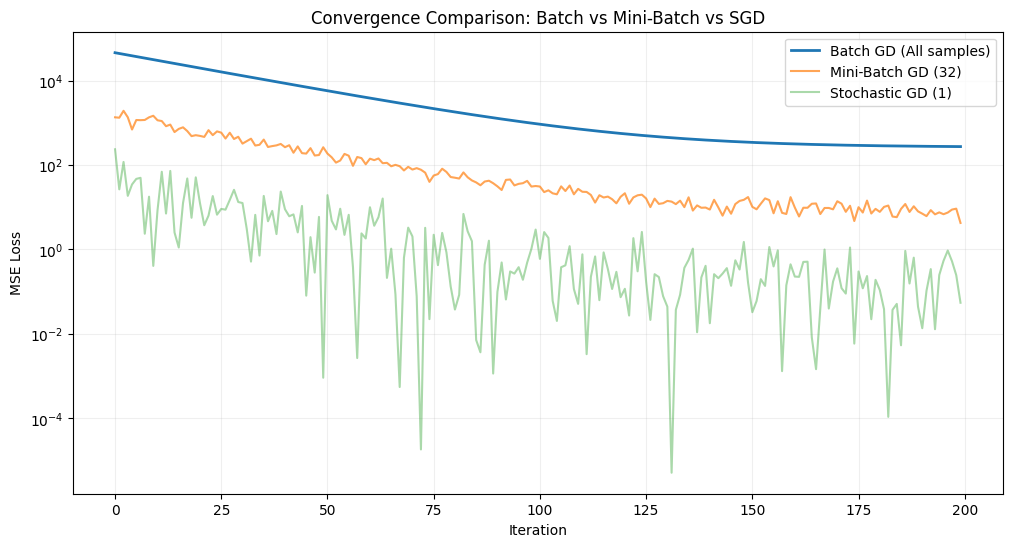

In [ ]:
import matplotlib.pyplot as plt

w_batch, b_batch, loss_batch = train_linear_regression(
    X, y, learning_rate=0.01, n_iterations=200, verbose=False
)

w_mini, b_mini, loss_mini = train_minibatch_gd(
    X, y, batch_size=32, learning_rate=0.01, n_iterations=200, verbose=False
)

w_sgd, b_sgd, loss_sgd = train_minibatch_gd(
    X, y, batch_size=1, learning_rate=0.01, n_iterations=200, verbose=False
)

plt.figure(figsize=(12, 6))
plt.plot(loss_batch, label='Batch GD (All samples)', linewidth=2)
plt.plot(loss_mini, label='Mini-Batch GD (32)', alpha=0.7)
plt.plot(loss_sgd, label='Stochastic GD (1)', alpha=0.4)

plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.title('Convergence Comparison: Batch vs Mini-Batch vs SGD')
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()